In [26]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot


In [27]:
df = pd.read_csv('Sleep_Data_Sampled.csv')
print(f"Dataset size: {df.shape}") 

Dataset size: (15000, 13)


In [28]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [29]:
# Features and Target
X = df[['Sleep Duration', 'Stress Level', 'Age', 'Heart Rate',
        'Physical Activity Level', 'Daily Steps', ]]
y = df['Quality of Sleep']

# Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
 
# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [31]:
# Predictions
y_pred_lr = linear_model.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression Results:")
print(f"R²: {metrics.r2_score(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)):.2f}")


Linear Regression Results:
R²: 0.84
RMSE: 0.42


In [32]:
# Check sizes of training and testing data
print(f"Total rows in the dataset: {len(df)}")
print(f"Rows in training set: {len(X_train)}")
print(f"Rows in testing set: {len(X_test)}")


Total rows in the dataset: 15000
Rows in training set: 12000
Rows in testing set: 3000


In [33]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
print(coefficients)


                   Feature  Coefficient
0           Sleep Duration     0.991015
1             Stress Level    -0.212786
2                      Age     0.016447
3               Heart Rate    -0.017346
4  Physical Activity Level     0.003186
5              Daily Steps     0.000138


Random Forest Regression

In [34]:
# Train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [35]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regression
print("\nRandom Forest Results:")
print(f"R²: {metrics.r2_score(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)):.2f}")



Random Forest Results:
R²: 1.00
RMSE: 0.06


In [36]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
                   Feature  Importance
0           Sleep Duration    0.776071
1             Stress Level    0.088802
3               Heart Rate    0.047287
2                      Age    0.038799
4  Physical Activity Level    0.028911
5              Daily Steps    0.020130


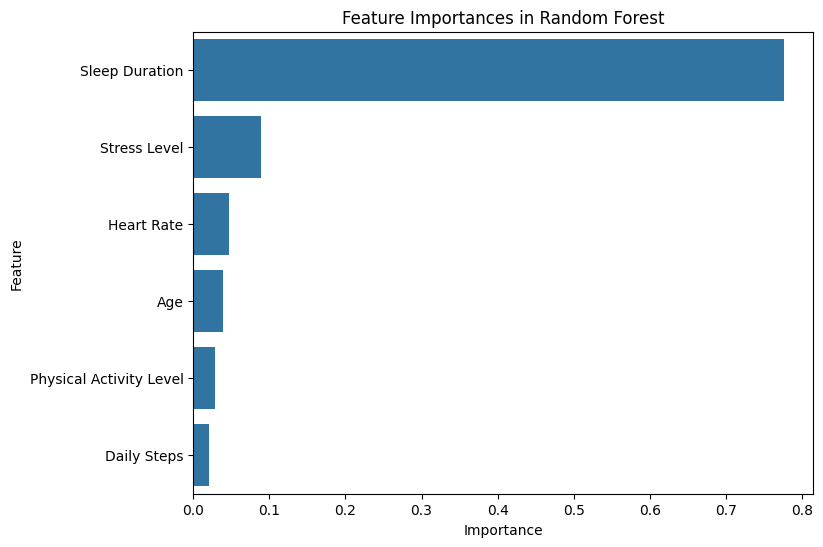

In [37]:
# Visualize Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest')
plt.show()


In [48]:
# Custom Input for Testing
user_input = {
    'Sleep Duration': float(input("Enter Sleep Duration (e.g., 7.5): ")),
    'Stress Level': int(input("Enter Stress Level (1-10): ")),
    'Age': int(input("Enter Age (e.g., 30): ")),
    'Heart Rate': int(input("Enter Heart Rate (e.g., 72): ")),
    'Physical Activity Level': int(input("Enter Physical Activity Level (1-5): ")),
    'Daily Steps': int(input("Enter Daily Steps (e.g., 5000): "))
}



# Convert to DataFrame
user_input_df = pd.DataFrame([user_input])  # Single row DataFrame
print(user_input_df)
# Linear Regression Prediction
pred_lr = linear_model.predict(user_input_df)
print(f"Linear Regression Prediction for Quality of Sleep: {pred_lr[0]:.2f}")

# Random Forest Prediction
pred_rf = rf_model.predict(user_input_df)
print(f"Random Forest Prediction for Quality of Sleep: {pred_rf[0]:.2f}")
print("Linear Model Features:", linear_model.coef_)
print("Random Forest Features:", rf_model.feature_importances_)



   Sleep Duration  Stress Level  Age  Heart Rate  Physical Activity Level  \
0             6.0             5   32          74                        3   

   Daily Steps  
0         6579  
Linear Regression Prediction for Quality of Sleep: 5.82
Random Forest Prediction for Quality of Sleep: 6.00
Linear Model Features: [ 9.91014652e-01 -2.12785644e-01  1.64469924e-02 -1.73461645e-02
  3.18626246e-03  1.38019809e-04]
Random Forest Features: [0.77607096 0.08880181 0.03879924 0.04728736 0.028911   0.02012963]


New Dataset size: (374, 13)
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1     

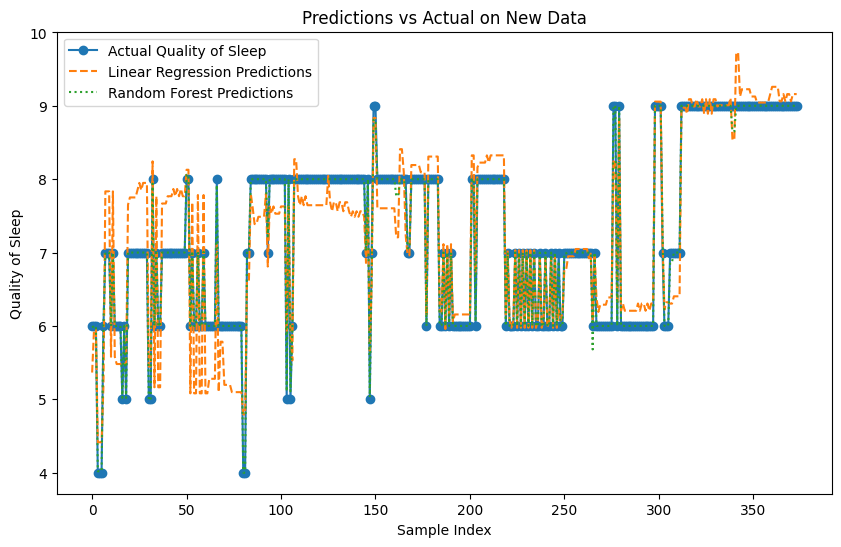

In [41]:
# Load the new dataset
new_df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
print(f"New Dataset size: {new_df.shape}")
print(new_df.head())

# Ensure the new data contains the required features
X_new = new_df[['Sleep Duration', 'Stress Level', 'Age', 'Heart Rate',
                'Physical Activity Level', 'Daily Steps']]
y_actual = new_df['Quality of Sleep']  # Actual target for evaluation

# Linear Regression Predictions
y_pred_lr_new = linear_model.predict(X_new)

# Random Forest Predictions
y_pred_rf_new = rf_model.predict(X_new)

# Evaluate Linear Regression
print("\nLinear Regression Evaluation on New Data:")
print(f"R²: {metrics.r2_score(y_actual, y_pred_lr_new):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_actual, y_pred_lr_new)):.2f}")

# Evaluate Random Forest Regression
print("\nRandom Forest Evaluation on New Data:")
print(f"R²: {metrics.r2_score(y_actual, y_pred_rf_new):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_actual, y_pred_rf_new)):.2f}")

# Optional: Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_actual.values, label='Actual Quality of Sleep', marker='o')
plt.plot(y_pred_lr_new, label='Linear Regression Predictions', linestyle='--')
plt.plot(y_pred_rf_new, label='Random Forest Predictions', linestyle=':')
plt.legend()
plt.title('Predictions vs Actual on New Data')
plt.xlabel('Sample Index')
plt.ylabel('Quality of Sleep')
plt.show()


In [44]:
# Define a tolerance level
tolerance = 0.5

# Check correctness for Linear Regression
correct_lr = abs(y_actual - y_pred_lr_new) <= tolerance

# Check correctness for Random Forest
correct_rf = abs(y_actual - y_pred_rf_new) <= tolerance

# Create a results DataFrame
results = pd.DataFrame({
    'Actual': y_actual,
    'Predicted_LR': y_pred_lr_new,
    'Correct_LR': correct_lr,
    'Predicted_RF': y_pred_rf_new,
    'Correct_RF': correct_rf
})

# Add a column to indicate the model's correctness
results['Correct_Both'] = results['Correct_LR'] & results['Correct_RF']
results['Wrong_Both'] = ~results['Correct_LR'] & ~results['Correct_RF']

# Count correct and incorrect predictions
print("Linear Regression Correct Predictions:", correct_lr.sum())
print("Linear Regression Incorrect Predictions:", (~correct_lr).sum())
print("Random Forest Correct Predictions:", correct_rf.sum())
print("Random Forest Incorrect Predictions:", (~correct_rf).sum())
print("Both Models Correct:", results['Correct_Both'].sum())
print("Both Models Wrong:", results['Wrong_Both'].sum())

# Save results to a CSV file
results.to_csv('prediction_results.csv', index=False)

print("Results saved to 'prediction_results.csv'")



Linear Regression Correct Predictions: 280
Linear Regression Incorrect Predictions: 94
Random Forest Correct Predictions: 374
Random Forest Incorrect Predictions: 0
Both Models Correct: 280
Both Models Wrong: 0
Results saved to 'prediction_results.csv'


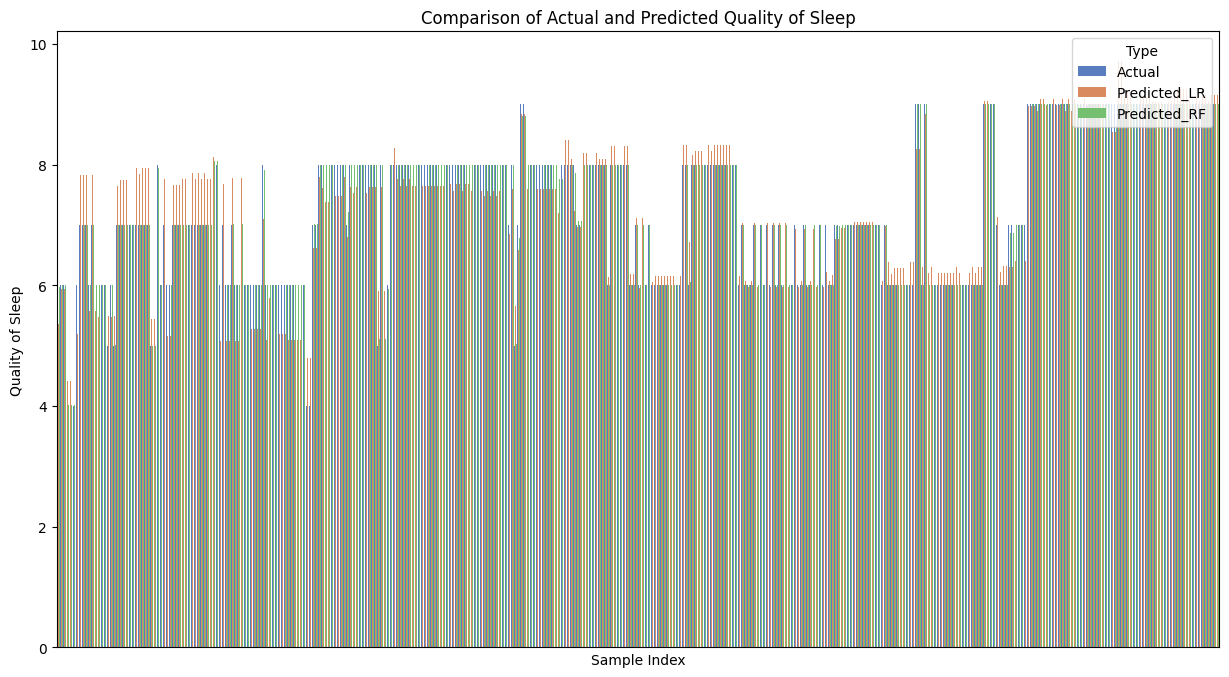

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for visualization
visual_data = pd.DataFrame({
    'Index': range(len(y_actual)),
    'Actual': y_actual,
    'Predicted_LR': y_pred_lr_new,
    'Predicted_RF': y_pred_rf_new
}).melt(id_vars='Index', var_name='Type', value_name='Quality of Sleep')

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=visual_data, x='Index', y='Quality of Sleep', hue='Type', dodge=True, palette='muted')
plt.title('Comparison of Actual and Predicted Quality of Sleep')
plt.xlabel('Sample Index')
plt.ylabel('Quality of Sleep')
plt.legend(title='Type', loc='upper right')
plt.xticks([], [])  # Hides x-axis ticks for better readability
plt.show()
